<a href="https://colab.research.google.com/github/gauravagrwal/Python-Scripts/blob/main/Predicting_Stock_Prices_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install quandl

In [2]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [3]:
quandl.ApiConfig.api_key = "syxsp6vt25jJpRrZ8_hz"

data = quandl.get("WIKI/AMZN")
data = data[['Adj. Close']]
data

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


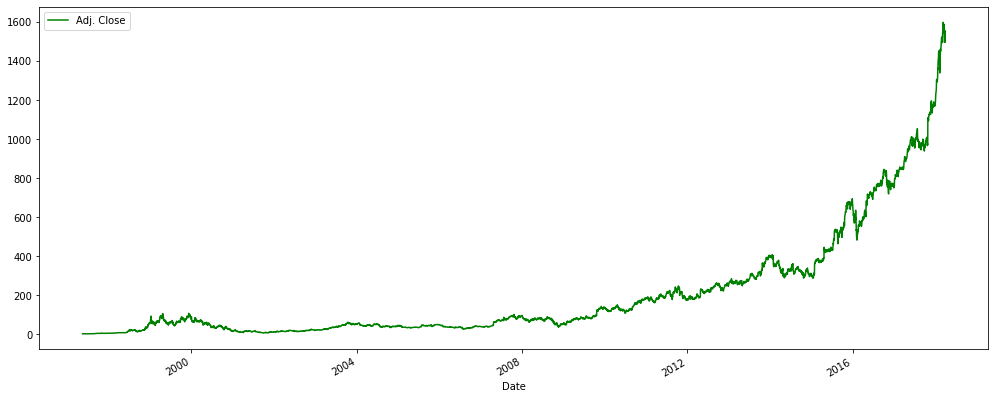

In [4]:
data['Adj. Close'].plot(figsize = (17,7), color='g')
plt.legend(loc='upper left')
plt.show()

In [5]:
forecast = 30
data['Prediction'] = data[['Adj. Close']].shift(-forecast)

X = np.array(data.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X=X[:-forecast]

y = np.array(data['Prediction'])
y = y[:-forecast]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
classifier = LinearRegression()
classifier.fit(X_train,y_train)

confidence = classifier.score(X_test, y_test)

forecast_predict = classifier.predict(X_forecast)
forecast_predict

array([1500.76486309, 1539.62036285, 1551.00904381, 1537.11081223,
       1558.01664489, 1573.50992982, 1575.4665286 , 1591.6722707 ,
       1615.01321815, 1604.41143017, 1604.91121356, 1584.70720438,
       1591.93811293, 1616.77841053, 1631.69747625, 1639.52387139,
       1646.81858207, 1675.56144355, 1696.29713718, 1685.44014067,
       1688.43884098, 1679.20879889, 1667.89455375, 1639.44943557,
       1683.6643146 , 1678.7196492 , 1638.56683937, 1586.95091277,
       1651.07205769, 1588.53533244])

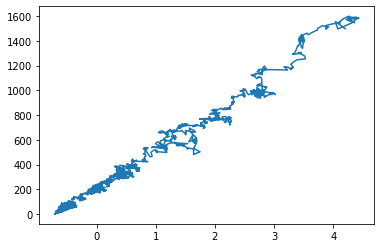

In [7]:
plt.plot(X,y)

(736445.0, 737192.5)

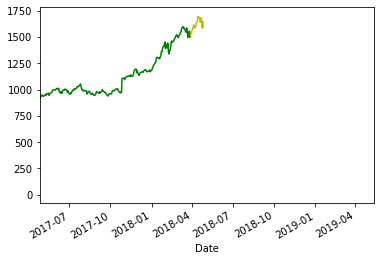

In [8]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predict, color='y')
data['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))